# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict laptop prices using the provided `laptops.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict laptop prices.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [1]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [3]:
def hash_columns(columns):
    col_str = ",".join(sorted(columns))
    return hashlib.sha256(col_str.encode()).hexdigest()

In [4]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [5]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [6]:
df = pd.read_csv("laptops.csv")

In [7]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99


In [8]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    descriptivestats = df.copy()
    descriptivestats = descriptivestats.describe()
    return descriptivestats

In [9]:
calculate_descriptive_statistics(df)

,Dimension (in),CPU Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,791.000000,791.000000,791.000000,691.000000,791.000000
mean,15.287611,2.388369,8.601770,2.151999,1113.184956
std,1.224031,0.371062,5.173638,0.654401,601.993594
min,12.500000,1.200000,4.000000,0.910000,339.000000
25%,14.000000,2.000000,4.000000,1.725000,684.995000
50%,15.600000,2.500000,8.000000,2.100000,973.000000
75%,15.600000,2.700000,8.000000,2.400000,1349.000000
max,17.300000,2.900000,64.000000,4.700000,3975.000000


In [10]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """

    copy_df = df.select_dtypes(include="number")
    sns.pairplot(copy_df)

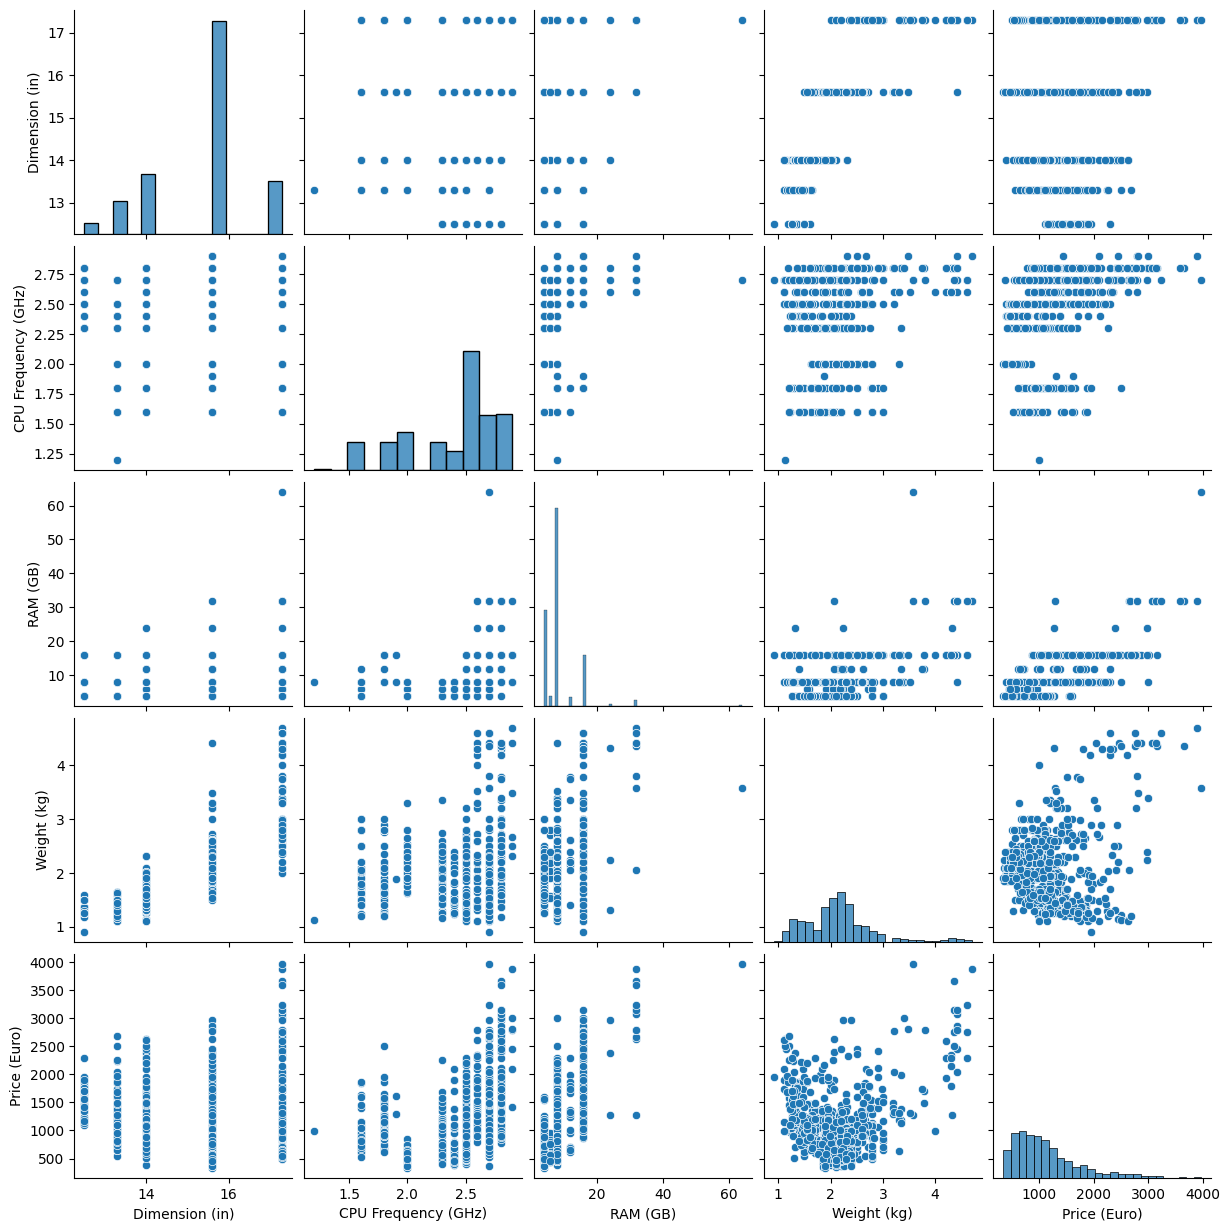

In [11]:
plot_pairwise_relationships(df)

In [12]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    copy_df = df.select_dtypes(include="number")
    sns.heatmap(copy_df.corr(numeric_only=True), annot=True)

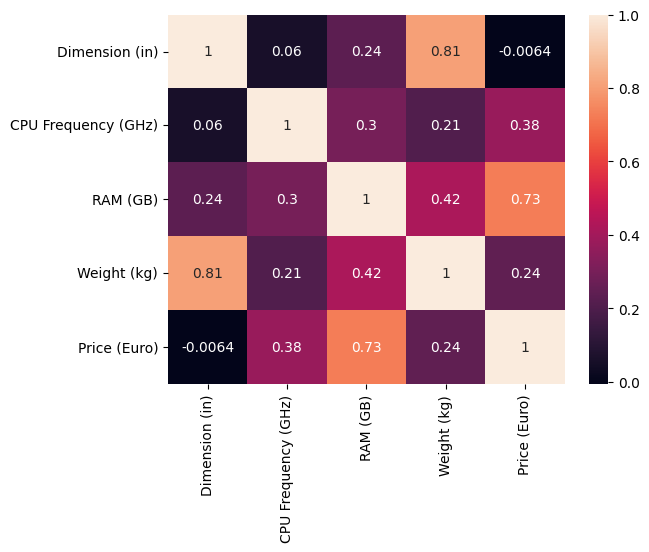

In [13]:
plot_correlation_intensity(df)

In [14]:
### MANUALLY GRADED TASK
def plot_price_distribution_per_type(df):
    """
    Create boxplots to show how laptop prices are distributed across different types.
    """

    # YOUR CODE HERE
    sns.boxplot(x=df["Type"],y=df["Price (Euro)"])

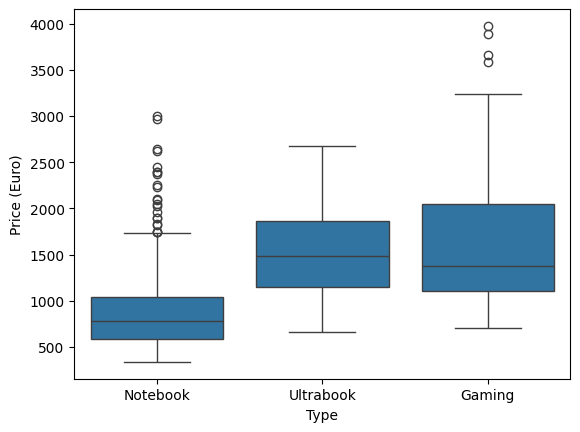

In [15]:
plot_price_distribution_per_type(df)

In [16]:
### MANUALLY GRADED TASK
def plot_laptop_count_per_type(df):
    """
    Create a bar plot showing the number of laptops available for each type.
    """

    df["Type"].value_counts().plot.bar()

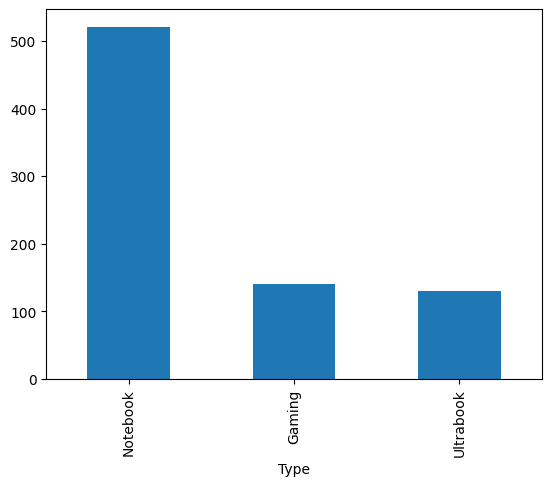

In [17]:
plot_laptop_count_per_type(df)

In [18]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_brand(df):
    """
    Encode the `Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    if "Brand" in df.columns:
        one_hot_encoded_values = pd.get_dummies(df["Brand"])
        df = pd.concat([df, one_hot_encoded_values], axis=1)
        df = df.drop(columns=["Brand"])

    print(df)
    return df

In [19]:
df = encode_or_drop_brand(df)

                                         Model       Type  Dimension (in)  \
0                                       250 G6   Notebook            15.6   
1                              ZenBook UX430UN  Ultrabook            14.0   
2                                      Swift 3  Ultrabook            14.0   
3                                       250 G6   Notebook            15.6   
4                                       250 G6   Notebook            15.6   
..                                         ...        ...             ...   
786                              Inspiron 3567   Notebook            15.6   
787                         IdeaPad Y700-15ISK   Notebook            15.6   
788                              Inspiron 3567   Notebook            15.6   
789  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook            15.6   
790        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook            15.6   

    Screen Resolution CPU Brand       CPU Model  CPU Frequency (GHz)  \
0  

In [20]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_brand(_df)
assert hash_data_frame(_df) == "bc0a5262a5a3c76876068bdd1d4aabc580e1a5d3e3bb5c508c59d5ed6a450c01"

                                         Model       Type  Dimension (in)  \
0                                       250 G6   Notebook            15.6   
1                              ZenBook UX430UN  Ultrabook            14.0   
2                                      Swift 3  Ultrabook            14.0   
3                                       250 G6   Notebook            15.6   
4                                       250 G6   Notebook            15.6   
..                                         ...        ...             ...   
786                              Inspiron 3567   Notebook            15.6   
787                         IdeaPad Y700-15ISK   Notebook            15.6   
788                              Inspiron 3567   Notebook            15.6   
789  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook            15.6   
790        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook            15.6   

    Screen Resolution CPU Brand       CPU Model  CPU Frequency (GHz)  \
0  

In [21]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_model(df):
    """
    Encode the `Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    #pravime drop bidejki ima premnogu vrednosti (so one-hot enkodiranje bi znacelo 200+ novi koloni)
    df = df.drop(columns=["Model"])
    
    print(df)
    return df

In [22]:
df = encode_or_drop_model(df)

          Type  Dimension (in) Screen Resolution CPU Brand       CPU Model  \
0     Notebook            15.6         1920x1080     Intel   Core i5 7200U   
1    Ultrabook            14.0         1920x1080     Intel   Core i7 8550U   
2    Ultrabook            14.0         1920x1080     Intel   Core i5 8250U   
3     Notebook            15.6          1366x768     Intel   Core i5 7200U   
4     Notebook            15.6         1920x1080     Intel   Core i3 6006U   
..         ...             ...               ...       ...             ...   
786   Notebook            15.6          1366x768     Intel   Core i3 7100U   
787   Notebook            15.6         1920x1080     Intel  Core i7 6700HQ   
788   Notebook            15.6          1366x768     Intel   Core i7 7500U   
789   Notebook            15.6          1366x768     Intel   Core i7 6500U   
790   Notebook            15.6          1366x768     Intel   Core i7 6500U   

     CPU Frequency (GHz) GPU Brand         GPU Model  RAM (GB) 

In [23]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

      Brand       Type  Dimension (in) Screen Resolution CPU Brand  \
0        HP   Notebook            15.6         1920x1080     Intel   
1      Asus  Ultrabook            14.0         1920x1080     Intel   
2      Acer  Ultrabook            14.0         1920x1080     Intel   
3        HP   Notebook            15.6          1366x768     Intel   
4        HP   Notebook            15.6         1920x1080     Intel   
..      ...        ...             ...               ...       ...   
786    Dell   Notebook            15.6          1366x768     Intel   
787  Lenovo   Notebook            15.6         1920x1080     Intel   
788    Dell   Notebook            15.6          1366x768     Intel   
789    Asus   Notebook            15.6          1366x768     Intel   
790      HP   Notebook            15.6          1366x768     Intel   

          CPU Model  CPU Frequency (GHz) GPU Brand         GPU Model  \
0     Core i5 7200U                  2.5     Intel   HD Graphics 620   
1     Core i7 8

In [24]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_type(df):
    """
    Encode the `Type` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    if "Type" in df.columns:
        one_hot_encoded_values = pd.get_dummies(df["Type"])
        df = pd.concat([df, one_hot_encoded_values], axis=1)
        df = df.drop(columns=["Type"])
   
    print(df)
    return df

In [25]:
df = encode_or_drop_type(df)

     Dimension (in) Screen Resolution CPU Brand       CPU Model  \
0              15.6         1920x1080     Intel   Core i5 7200U   
1              14.0         1920x1080     Intel   Core i7 8550U   
2              14.0         1920x1080     Intel   Core i5 8250U   
3              15.6          1366x768     Intel   Core i5 7200U   
4              15.6         1920x1080     Intel   Core i3 6006U   
..              ...               ...       ...             ...   
786            15.6          1366x768     Intel   Core i3 7100U   
787            15.6         1920x1080     Intel  Core i7 6700HQ   
788            15.6          1366x768     Intel   Core i7 7500U   
789            15.6          1366x768     Intel   Core i7 6500U   
790            15.6          1366x768     Intel   Core i7 6500U   

     CPU Frequency (GHz) GPU Brand         GPU Model  RAM (GB)    HDD    SSD  \
0                    2.5     Intel   HD Graphics 620         8    NaN   True   
1                    1.8    Nvidia 

In [26]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

      Brand       Type  Dimension (in) Screen Resolution CPU Brand  \
0        HP   Notebook            15.6         1920x1080     Intel   
1      Asus  Ultrabook            14.0         1920x1080     Intel   
2      Acer  Ultrabook            14.0         1920x1080     Intel   
3        HP   Notebook            15.6          1366x768     Intel   
4        HP   Notebook            15.6         1920x1080     Intel   
..      ...        ...             ...               ...       ...   
786    Dell   Notebook            15.6          1366x768     Intel   
787  Lenovo   Notebook            15.6         1920x1080     Intel   
788    Dell   Notebook            15.6          1366x768     Intel   
789    Asus   Notebook            15.6          1366x768     Intel   
790      HP   Notebook            15.6          1366x768     Intel   

          CPU Model  CPU Frequency (GHz) GPU Brand         GPU Model  \
0     Core i5 7200U                  2.5     Intel   HD Graphics 620   
1     Core i7 8

In [27]:
### AUTOMATICALLY GRADED TASK
def split_and_cast_screen_resolution(df):
    """
    Split the `Screen Resolution` column into two new integer columns
    `Horizontal Resolution` and `Vertical Resolution`. Add these columns to the dataset
    and remove the original `Screen Resolution` column.

    
    Return the updated dataset as `pd.DataFrame`.
    """

    import re
    if "Screen Resolution" in df.columns:
        df["Horizontal Resolution"] = df["Screen Resolution"].apply(lambda x: int(re.findall(r"\d+", str(x))[0]))
        df["Vertical Resolution"] = df["Screen Resolution"].apply(lambda x: int(re.findall(r"\d+", str(x))[1]))
        df = df.drop(columns=["Screen Resolution"])

    print(df)
    return df

In [28]:
df = split_and_cast_screen_resolution(df)

     Dimension (in) CPU Brand       CPU Model  CPU Frequency (GHz) GPU Brand  \
0              15.6     Intel   Core i5 7200U                  2.5     Intel   
1              14.0     Intel   Core i7 8550U                  1.8    Nvidia   
2              14.0     Intel   Core i5 8250U                  1.6     Intel   
3              15.6     Intel   Core i5 7200U                  2.5     Intel   
4              15.6     Intel   Core i3 6006U                  2.0     Intel   
..              ...       ...             ...                  ...       ...   
786            15.6     Intel   Core i3 7100U                  2.4     Intel   
787            15.6     Intel  Core i7 6700HQ                  2.6    Nvidia   
788            15.6     Intel   Core i7 7500U                  2.7       AMD   
789            15.6     Intel   Core i7 6500U                  2.5    Nvidia   
790            15.6     Intel   Core i7 6500U                  2.5       AMD   

            GPU Model  RAM (GB)    HDD 

In [29]:
_df = pd.read_csv("laptops.csv")
_df = split_and_cast_screen_resolution(_df)
assert hash_data_frame(_df) == "09262c30e1d8b769fa7bf343438f9cd9e19377e13ce232cbaad8cdb09c43fd44"

      Brand                                      Model       Type  \
0        HP                                     250 G6   Notebook   
1      Asus                            ZenBook UX430UN  Ultrabook   
2      Acer                                    Swift 3  Ultrabook   
3        HP                                     250 G6   Notebook   
4        HP                                     250 G6   Notebook   
..      ...                                        ...        ...   
786    Dell                              Inspiron 3567   Notebook   
787  Lenovo                         IdeaPad Y700-15ISK   Notebook   
788    Dell                              Inspiron 3567   Notebook   
789    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   
790      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook   

     Dimension (in) CPU Brand       CPU Model  CPU Frequency (GHz) GPU Brand  \
0              15.6     Intel   Core i5 7200U                  2.5     Intel   
1          

In [30]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_brand(df):
    """
    Encode the `CPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # print(df["CPU Brand"].value_counts())
    if "CPU Brand" in df.columns:    
        df = df.drop(columns=["CPU Brand"])
    
    return df

In [31]:
df = encode_or_drop_cpu_brand(df)

In [32]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_brand(_df)
hash_data_frame(_df)
assert hash_data_frame(_df) == "3343d38a78aa5244e870b515abe379128a6cbdd0c0af4c427ea35bd2b9d4c0f4"

In [33]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_model(df):
    """
    Encode the `CPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # print(df["CPU Model"].value_counts())
    if "CPU Model" in df.columns:
        df = df.drop(columns=["CPU Model"])
    
    print(df)
    return df

In [34]:
df = encode_or_drop_cpu_model(df)

     Dimension (in)  CPU Frequency (GHz) GPU Brand         GPU Model  \
0              15.6                  2.5     Intel   HD Graphics 620   
1              14.0                  1.8    Nvidia     GeForce MX150   
2              14.0                  1.6     Intel  UHD Graphics 620   
3              15.6                  2.5     Intel   HD Graphics 620   
4              15.6                  2.0     Intel   HD Graphics 520   
..              ...                  ...       ...               ...   
786            15.6                  2.4     Intel   HD Graphics 620   
787            15.6                  2.6    Nvidia  GeForce GTX 960M   
788            15.6                  2.7       AMD    Radeon R5 M430   
789            15.6                  2.5    Nvidia      GeForce 920M   
790            15.6                  2.5       AMD    Radeon R5 M330   

     RAM (GB)    HDD    SSD       OS  Weight (kg)  Price (Euro)   Acer   Asus  \
0           8    NaN   True    No OS         1.86     

In [35]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_model(_df)
assert hash_data_frame(_df) == "2e6601709f90f761739234d4fd5a541c0524cd39155c1e657de44340e1de9b6b"

      Brand                                      Model       Type  \
0        HP                                     250 G6   Notebook   
1      Asus                            ZenBook UX430UN  Ultrabook   
2      Acer                                    Swift 3  Ultrabook   
3        HP                                     250 G6   Notebook   
4        HP                                     250 G6   Notebook   
..      ...                                        ...        ...   
786    Dell                              Inspiron 3567   Notebook   
787  Lenovo                         IdeaPad Y700-15ISK   Notebook   
788    Dell                              Inspiron 3567   Notebook   
789    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   
790      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook   

     Dimension (in) Screen Resolution CPU Brand  CPU Frequency (GHz)  \
0              15.6         1920x1080     Intel                  2.5   
1              14.0        

In [36]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_brand(df):
    """
    Encode the `GPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # print(df["GPU Brand"].value_counts())
    if "GPU Brand" in df.columns:
        one_hot_encoding = pd.get_dummies(df["GPU Brand"])
        df = pd.concat([df,one_hot_encoding],axis=1)
        df = df.drop(columns=["GPU Brand"])

    print(df)
    return df

In [37]:
df = encode_or_drop_gpu_brand(df)

     Dimension (in)  CPU Frequency (GHz)         GPU Model  RAM (GB)    HDD  \
0              15.6                  2.5   HD Graphics 620         8    NaN   
1              14.0                  1.8     GeForce MX150        16  False   
2              14.0                  1.6  UHD Graphics 620         8  False   
3              15.6                  2.5   HD Graphics 620         4   True   
4              15.6                  2.0   HD Graphics 520         4   True   
..              ...                  ...               ...       ...    ...   
786            15.6                  2.4   HD Graphics 620         6   True   
787            15.6                  2.6  GeForce GTX 960M         8    NaN   
788            15.6                  2.7    Radeon R5 M430         8   True   
789            15.6                  2.5      GeForce 920M         4   True   
790            15.6                  2.5    Radeon R5 M330         6   True   

       SSD       OS  Weight (kg)  Price (Euro)   Ac

In [38]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_brand(_df)
assert hash_data_frame(_df) == "9d72d28212577a75e92e38a6ba043c38cf3e638619b85eb771d76b1e60a67e9e"

      Brand                                      Model       Type  \
0        HP                                     250 G6   Notebook   
1      Asus                            ZenBook UX430UN  Ultrabook   
2      Acer                                    Swift 3  Ultrabook   
3        HP                                     250 G6   Notebook   
4        HP                                     250 G6   Notebook   
..      ...                                        ...        ...   
786    Dell                              Inspiron 3567   Notebook   
787  Lenovo                         IdeaPad Y700-15ISK   Notebook   
788    Dell                              Inspiron 3567   Notebook   
789    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   
790      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook   

     Dimension (in) Screen Resolution CPU Brand       CPU Model  \
0              15.6         1920x1080     Intel   Core i5 7200U   
1              14.0         1920x1080

In [39]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_model(df):
    """
    Encode the `GPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # print(df["GPU Model"].value_counts())
    # Mnogu koloni ima = drop

    if "GPU Model" in df.columns:
        df = df.drop(columns=["GPU Model"])

    print(df)
    return df

In [40]:
df = encode_or_drop_gpu_model(df)

     Dimension (in)  CPU Frequency (GHz)  RAM (GB)    HDD    SSD       OS  \
0              15.6                  2.5         8    NaN   True    No OS   
1              14.0                  1.8        16  False   True  Windows   
2              14.0                  1.6         8  False   True  Windows   
3              15.6                  2.5         4   True    NaN    No OS   
4              15.6                  2.0         4   True  False    No OS   
..              ...                  ...       ...    ...    ...      ...   
786            15.6                  2.4         6   True  False  Windows   
787            15.6                  2.6         8    NaN    NaN  Windows   
788            15.6                  2.7         8   True  False    Linux   
789            15.6                  2.5         4   True  False  Windows   
790            15.6                  2.5         6   True  False  Windows   

     Weight (kg)  Price (Euro)   Acer   Asus  ...     HP  Lenovo  Gaming  \

In [41]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_model(_df)
assert hash_data_frame(_df) == "2b9f5feb888687e9c01adb73dfb64d52e93e85c7356423028ce3b6ca35825b3a"

      Brand                                      Model       Type  \
0        HP                                     250 G6   Notebook   
1      Asus                            ZenBook UX430UN  Ultrabook   
2      Acer                                    Swift 3  Ultrabook   
3        HP                                     250 G6   Notebook   
4        HP                                     250 G6   Notebook   
..      ...                                        ...        ...   
786    Dell                              Inspiron 3567   Notebook   
787  Lenovo                         IdeaPad Y700-15ISK   Notebook   
788    Dell                              Inspiron 3567   Notebook   
789    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   
790      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook   

     Dimension (in) Screen Resolution CPU Brand       CPU Model  \
0              15.6         1920x1080     Intel   Core i5 7200U   
1              14.0         1920x1080

In [42]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_os(df):
    """
    Encode the `OS` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # print(df["OS"].value_counts())
    
    if "OS" in df.columns:
        one_hot_encoding = pd.get_dummies(df["OS"])
        df = pd.concat([df,one_hot_encoding],axis=1)
        df = df.drop(columns=["OS"])

    print(df)
    return df

In [43]:
df = encode_or_drop_os(df)

     Dimension (in)  CPU Frequency (GHz)  RAM (GB)    HDD    SSD  Weight (kg)  \
0              15.6                  2.5         8    NaN   True         1.86   
1              14.0                  1.8        16  False   True         1.30   
2              14.0                  1.6         8  False   True         1.60   
3              15.6                  2.5         4   True    NaN         1.86   
4              15.6                  2.0         4   True  False          NaN   
..              ...                  ...       ...    ...    ...          ...   
786            15.6                  2.4         6   True  False          NaN   
787            15.6                  2.6         8    NaN    NaN         2.60   
788            15.6                  2.7         8   True  False         2.30   
789            15.6                  2.5         4   True  False          NaN   
790            15.6                  2.5         6   True  False          NaN   

     Price (Euro)   Acer   

In [44]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_os(_df)
assert hash_data_frame(_df) == "a3996c22b8e19ebc9ef0a3ae5625a9d05b41e3d05f81335345d3f6760a16ac54"

      Brand                                      Model       Type  \
0        HP                                     250 G6   Notebook   
1      Asus                            ZenBook UX430UN  Ultrabook   
2      Acer                                    Swift 3  Ultrabook   
3        HP                                     250 G6   Notebook   
4        HP                                     250 G6   Notebook   
..      ...                                        ...        ...   
786    Dell                              Inspiron 3567   Notebook   
787  Lenovo                         IdeaPad Y700-15ISK   Notebook   
788    Dell                              Inspiron 3567   Notebook   
789    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   
790      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook   

     Dimension (in) Screen Resolution CPU Brand       CPU Model  \
0              15.6         1920x1080     Intel   Core i5 7200U   
1              14.0         1920x1080

In [45]:
def impute_hdd_and_ssd(df):
    predictors = ["HDD", "SSD", "RAM (GB)", "Weight (kg)", "Price (Euro)"]

    # konvertiraj booleans vo float direktno
    df["HDD"] = df["HDD"].astype(float)
    df["SSD"] = df["SSD"].astype(float)

    # iterativna imputacija na site predictors
    iterative_imputer = IterativeImputer(random_state=RANDOM_STATE)
    imputed_data = iterative_imputer.fit_transform(df[predictors])

    # konvertirame nazad od float vo boolean (so rounding)
    df["HDD"] = imputed_data[:, 0].round().astype(bool)
    df["SSD"] = imputed_data[:, 1].round().astype(bool)

    return df

In [46]:
### AUTOMATICALLY GRADED TASK
def impute_hdd_and_ssd(df):
    """
    Fill in missing values in the `HDD` and `SSD` columns.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    iterative_imputer = IterativeImputer()
    imputed_data = iterative_imputer.fit_transform(df[["HDD","SSD"]])
    df[["HDD","SSD"]] = imputed_data
    return df

In [47]:
df = impute_hdd_and_ssd(df)

In [48]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_hdd_and_ssd(_df)
assert hash_data_frame(_df) == "48460c7730ee69a4b1138807c225223e328afd74b91f4c0de0377fe13d5af522"

In [49]:
### AUTOMATICALLY GRADED TASK
def impute_weight(df):
    """
    Fill in missing values in the `Weight (kg)` column.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    predictors = ["Weight (kg)","Dimension (in)"]
    
    iterative_imputer = IterativeImputer(random_state=RANDOM_STATE)
    
    imputed_data = iterative_imputer.fit_transform(df[predictors])
    
    df["Weight (kg)"] = imputed_data[:,0]
    print (df)
    return df

In [50]:
df = impute_weight(df)

     Dimension (in)  CPU Frequency (GHz)  RAM (GB)       HDD       SSD  \
0              15.6                  2.5         8  0.269094  1.000000   
1              14.0                  1.8        16  0.000000  1.000000   
2              14.0                  1.6         8  0.000000  1.000000   
3              15.6                  2.5         4  1.000000  0.362893   
4              15.6                  2.0         4  1.000000  0.000000   
..              ...                  ...       ...       ...       ...   
786            15.6                  2.4         6  1.000000  0.000000   
787            15.6                  2.6         8  0.507979  0.684868   
788            15.6                  2.7         8  1.000000  0.000000   
789            15.6                  2.5         4  1.000000  0.000000   
790            15.6                  2.5         6  1.000000  0.000000   

     Weight (kg)  Price (Euro)   Acer   Asus   Dell  ...  Notebook  Ultrabook  \
0       1.860000        575.00

In [51]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_weight(_df)
assert hash_data_frame(_df) == "2dc75df9d166ac93c946a68940ea318bbff0c3881a25e58af7495203512340b0"

      Brand                                      Model       Type  \
0        HP                                     250 G6   Notebook   
1      Asus                            ZenBook UX430UN  Ultrabook   
2      Acer                                    Swift 3  Ultrabook   
3        HP                                     250 G6   Notebook   
4        HP                                     250 G6   Notebook   
..      ...                                        ...        ...   
786    Dell                              Inspiron 3567   Notebook   
787  Lenovo                         IdeaPad Y700-15ISK   Notebook   
788    Dell                              Inspiron 3567   Notebook   
789    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   Notebook   
790      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   Notebook   

     Dimension (in) Screen Resolution CPU Brand       CPU Model  \
0              15.6         1920x1080     Intel   Core i5 7200U   
1              14.0         1920x1080

In [52]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """
    # vo features gi stavame site koloni osven Price, vo target stavame Price
    X, y = df.drop(columns = ["Price (Euro)"]), df["Price (Euro)"]
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    
    return train_X, test_X, train_y, test_y

In [53]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [54]:
_df = pd.read_csv("laptops.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "04956da18ddf9c388d041b45004345b13b298ca0310967592c46e5c9b650de45"
assert hash_data_frame(_test_X) == "2be390f98b560ff81ecb70ac0630d81c50a932b68368f7f09b9d71ef02aaf23f"
assert hash_series(_train_y) == "314cbe0e97f0eade41a16b7ace6d97563f05a194f613947b3fc517b74472cf0a"
assert hash_series(_test_y) == "9211c8582f77328da6cfb22a0411523225a83f2bf4be9fabc60e97ab717c7601"

In [55]:
### AUTOMATICALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a Lasso (L1-regularized) linear regression model with cross-validation.
    - Use `alphas=[0.001, 0.01, 0.1, 1.0, 10.0]`.
    - Perform 10-fold cross-validation to select the best `alpha`.

    Return the trained model.
    """

    regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=10, random_state=RANDOM_STATE)
    model = regressor.fit(train_X, train_y)
    
    return model

In [56]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1)).reshape(-1)

In [57]:
model = fit_model(train_X, train_y)

In [58]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "CPU Frequency (GHz)", "RAM (GB)"]], _df["Price (Euro)"])
assert _model.alpha_.item() == 0.1
coef1, coef2, coef3 = _model.coef_.tolist()
assert int(coef1) == -91 and int(coef2) == 286 and int(coef3) == 83
assert int(_model.intercept_) == 1111

In [59]:
pred_y = model.predict(test_X)

In [60]:
pred_y = scaler.inverse_transform(pred_y.reshape(-1, 1)).reshape(-1)

In [61]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """
    print(f"MAE: (Modelot e off za tolku Euro) {mean_absolute_error(test_y, pred_y)}")
    print(f"MAPE: (procenti kolku euro e off modelot) {mean_absolute_percentage_error(test_y, pred_y)*100}")
    print(f"MSE:  {mean_squared_error(test_y, pred_y)}")
    print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
    # R2 = kolku procenti od features moze modelot da sfakja korelacija
    print(f"R2 Score: {r2_score(test_y, pred_y)*100}")

In [62]:
evaluate_model(test_y, pred_y)

MAE: (Modelot e off za tolku Euro) 236.74526331085605
MAPE: (procenti kolku euro e off modelot) 23.610165195719134
MSE:  104028.80175884822
RMSE: 322.5349620720957
R2 Score: 64.36101535293282


In [63]:
### AUTOMATICALLY GRADED TASK
def perform_feature_selection(model, train_X, test_X):
    """
    Select features based on the trained model.
    Keep only the selected features in both training and test sets.

    Return the updated train_X and test_X.
    """

    selected_features = train_X.columns[model.coef_ != 0]
    train_X = train_X[selected_features]
    test_X = test_X[selected_features]
    
    return train_X, test_X 

In [64]:
train_X, test_X = perform_feature_selection(model, train_X, test_X)

In [65]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "RAM (GB)"]][:500], _df["CPU Frequency (GHz)"][:500])
_train_X, _test_X = perform_feature_selection(_model, _df[["Dimension (in)", "RAM (GB)"]][:500], _df[["Dimension (in)", "RAM (GB)"]][500:])
assert hash_data_frame(_train_X) == "4610875da9717f5758faeccc5dec8e6555bc18967aaa058ad1b2b8b503101b57"
assert hash_data_frame(_test_X) == "a429556e734d7d17615e856fced0de8943c7914f54797d316c9c44e4d1144052"

In [66]:
"""
    Dopolnitelna zadaca:
    income <50K = low
    50-90 = minimum
    >90 = high
    nova kolona so ovie, i model za da predvidime klasifikacija
"""

'\n    Dopolnitelna zadaca:\n    income <50K = low\n    50-90 = minimum\n    >90 = high\n    nova kolona so ovie, i model za da predvidime klasifikacija\n'

In [67]:
df = pd.read_csv("vacation_preferences_data.csv")
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0


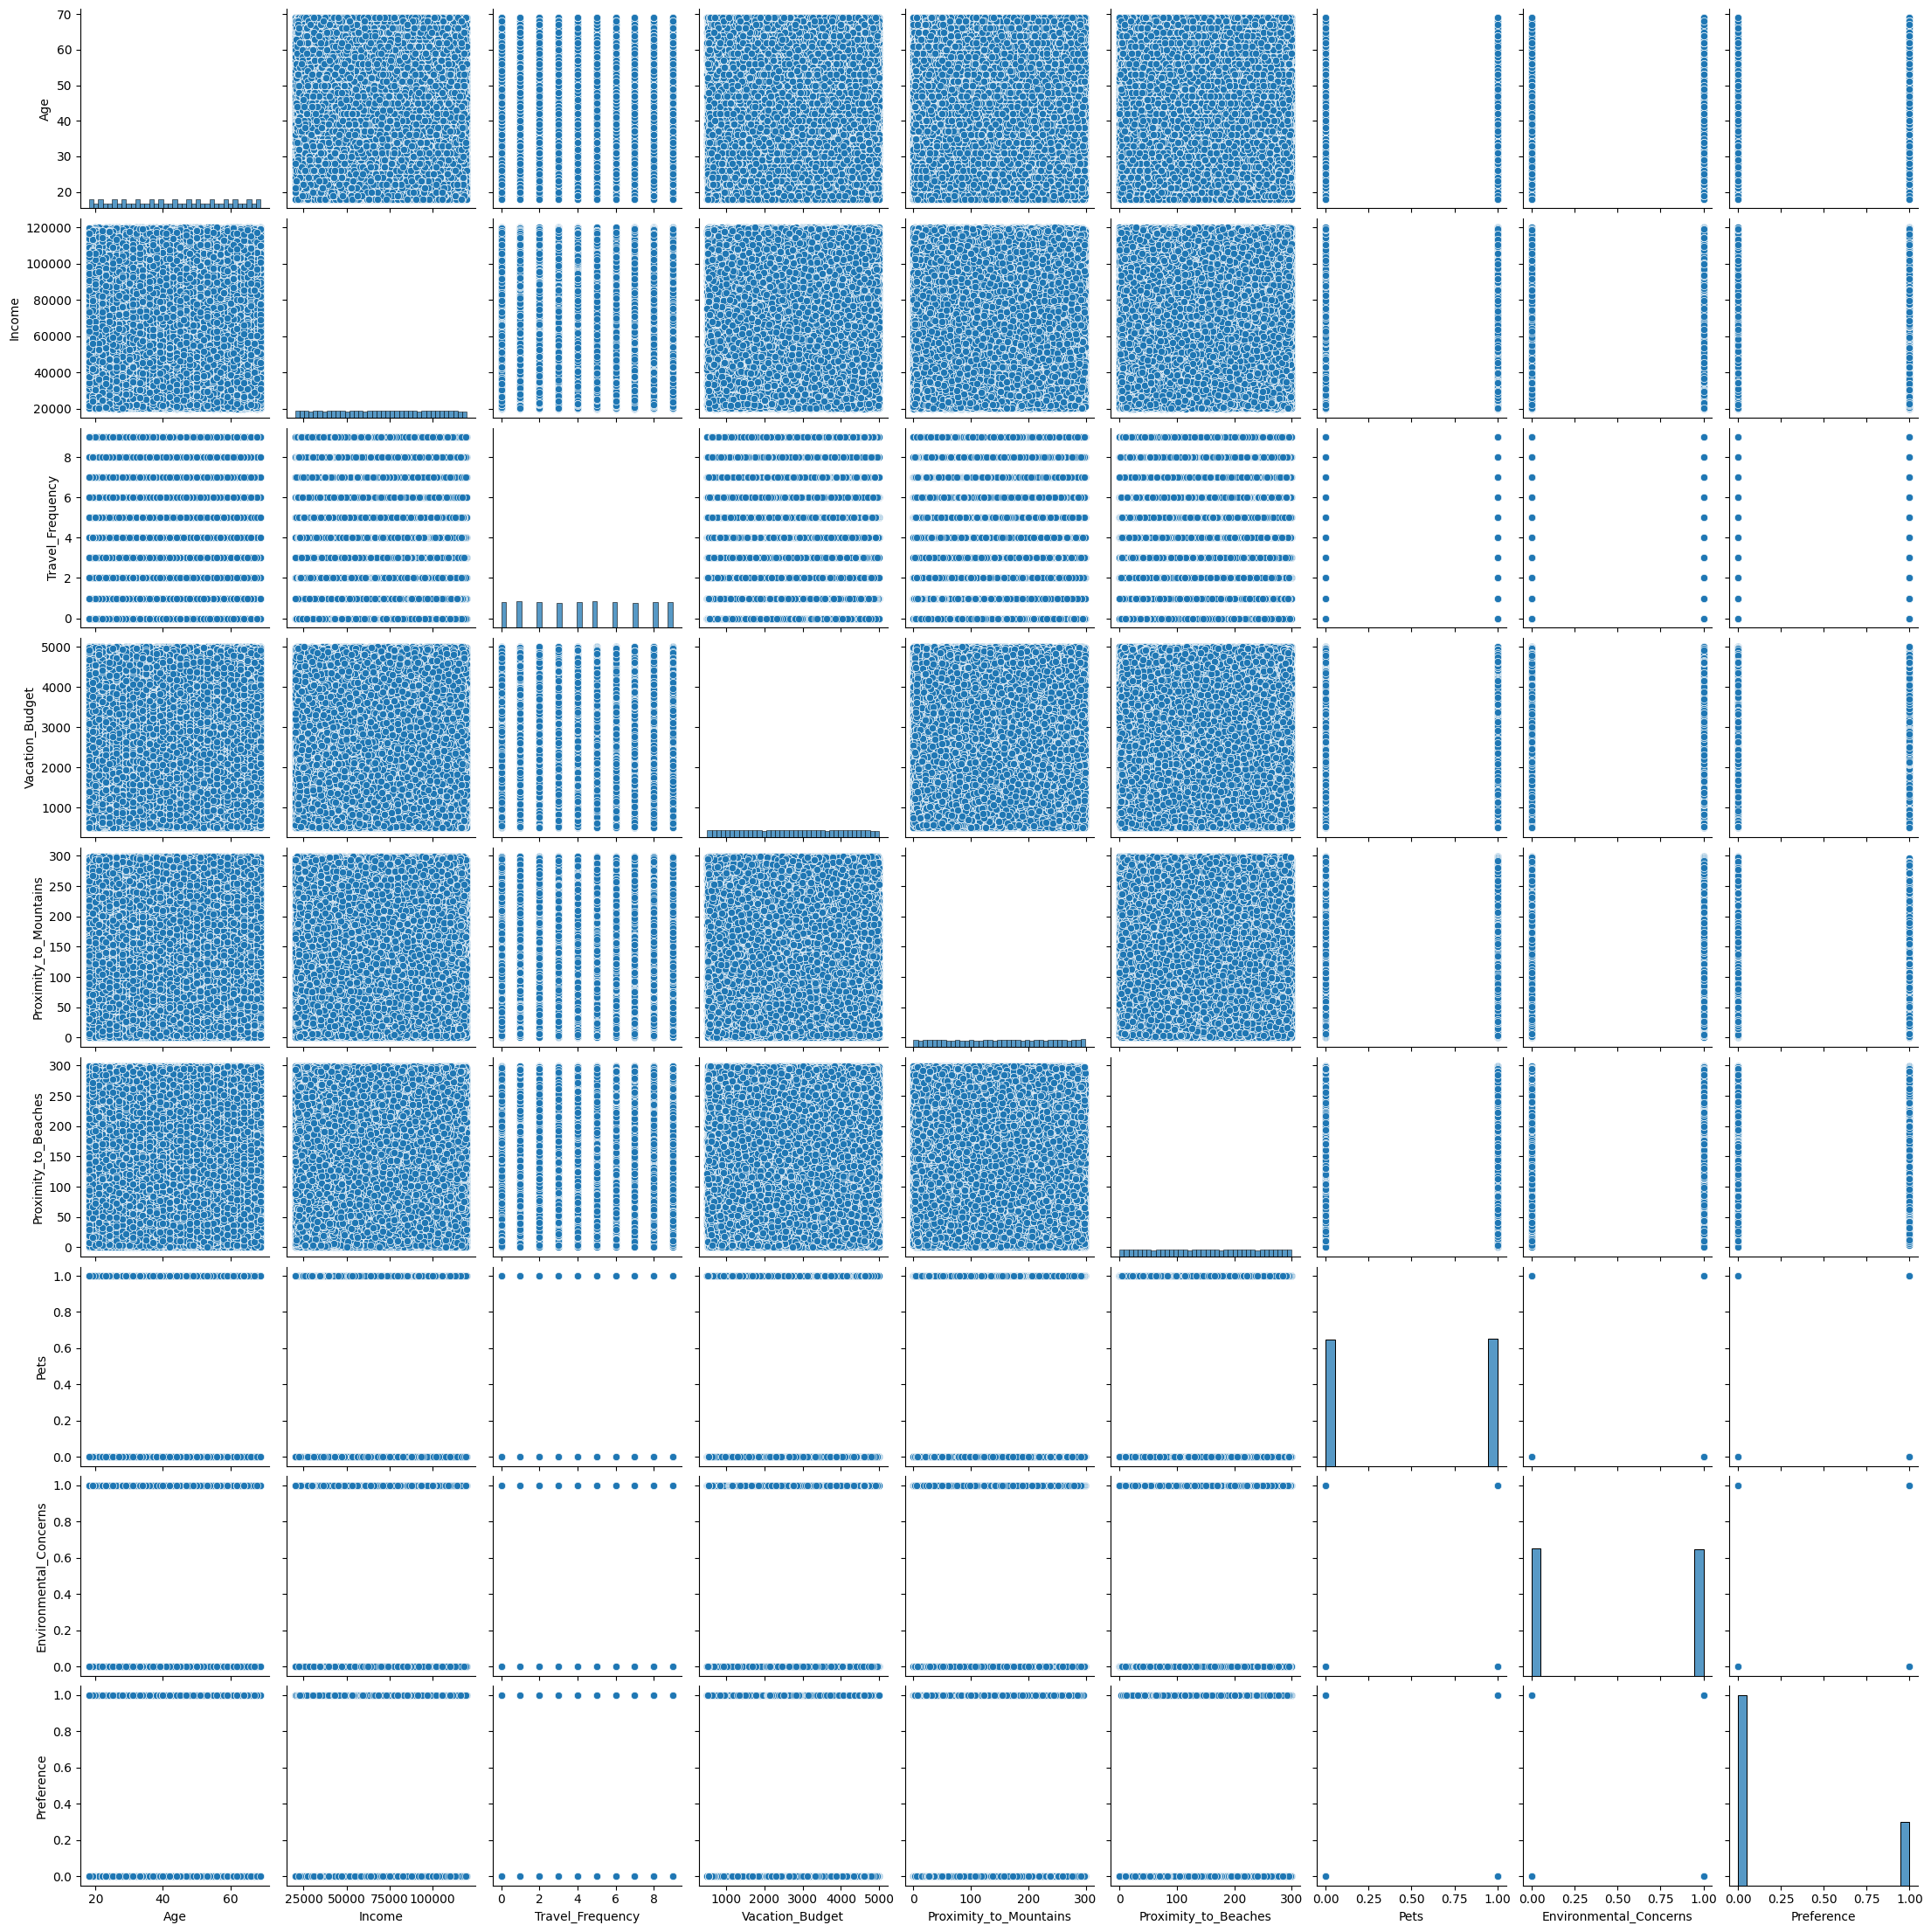

In [68]:
#Exploratory Data Analysis (EDA)
calculate_descriptive_statistics(df)

#pairplot za korelacija na site numericki variabili
copy_df = df.select_dtypes(include="number")
sns.pairplot(copy_df)

<Axes: >

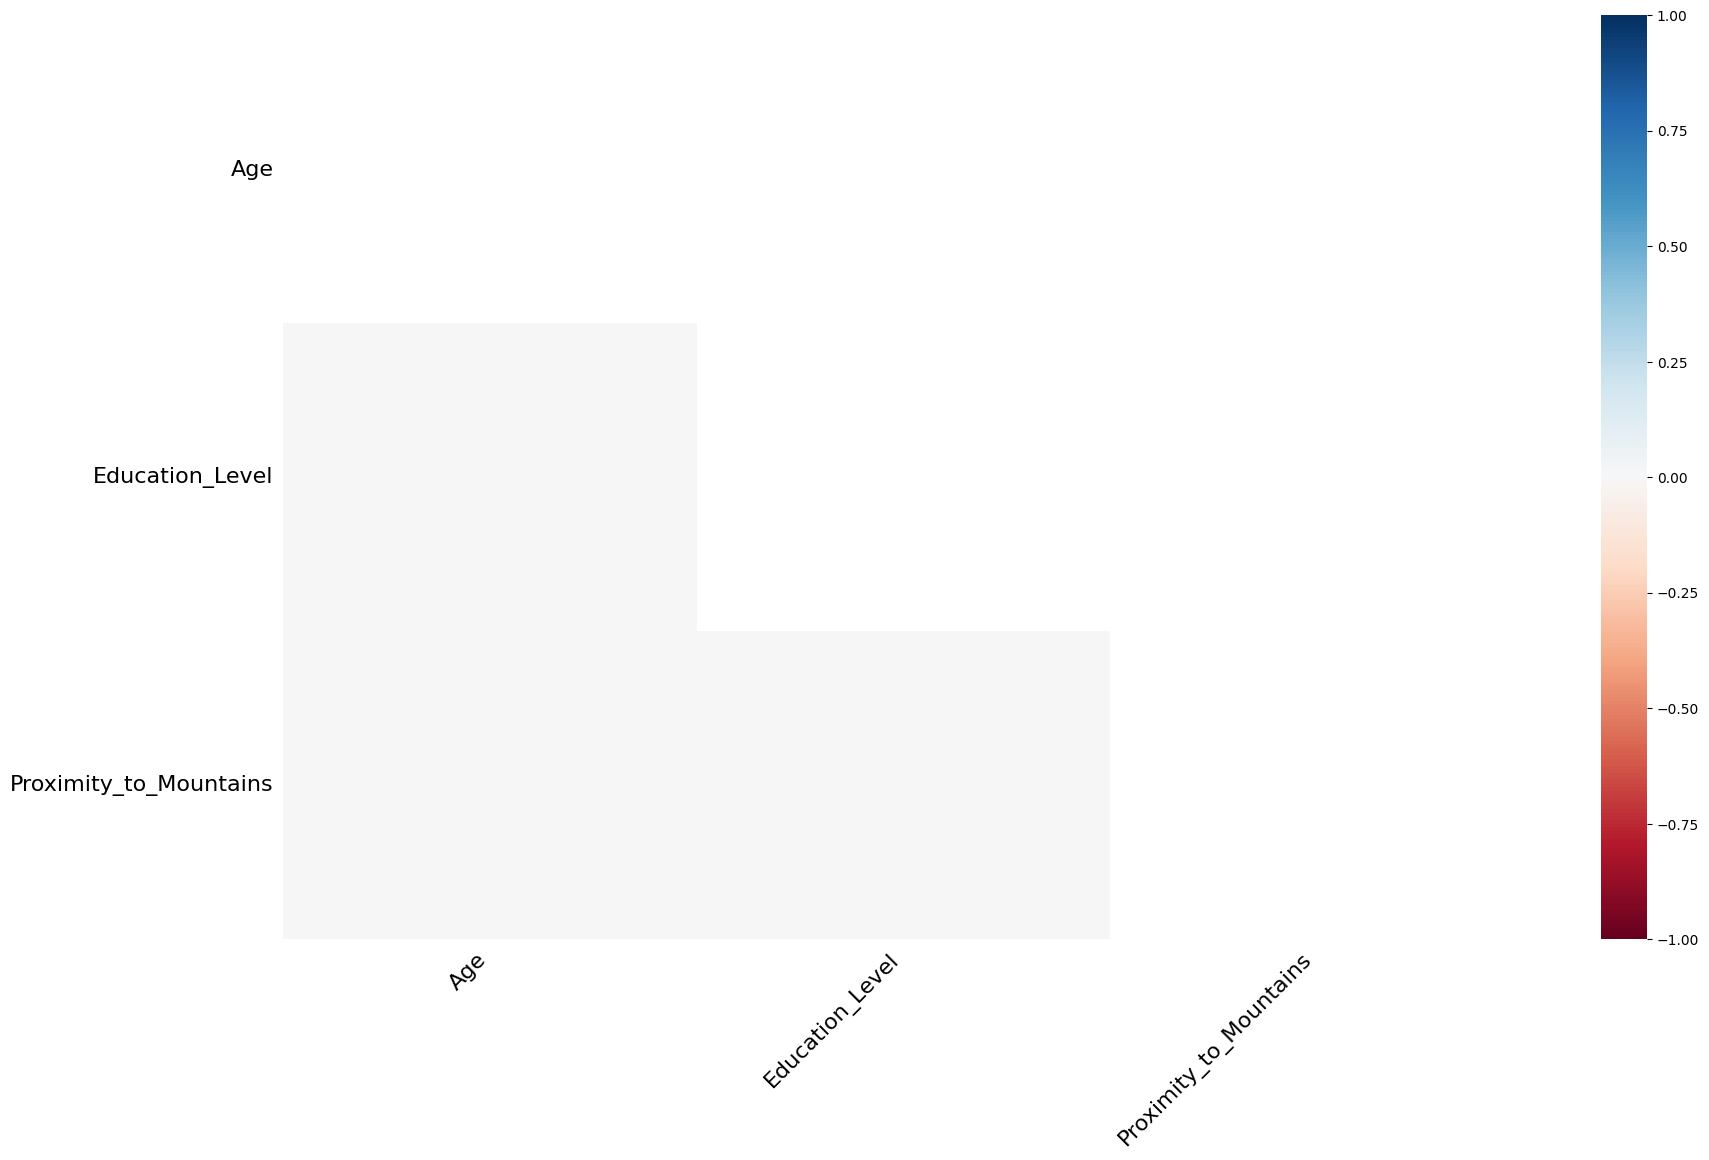

In [69]:
msno.heatmap(df)

<Axes: >

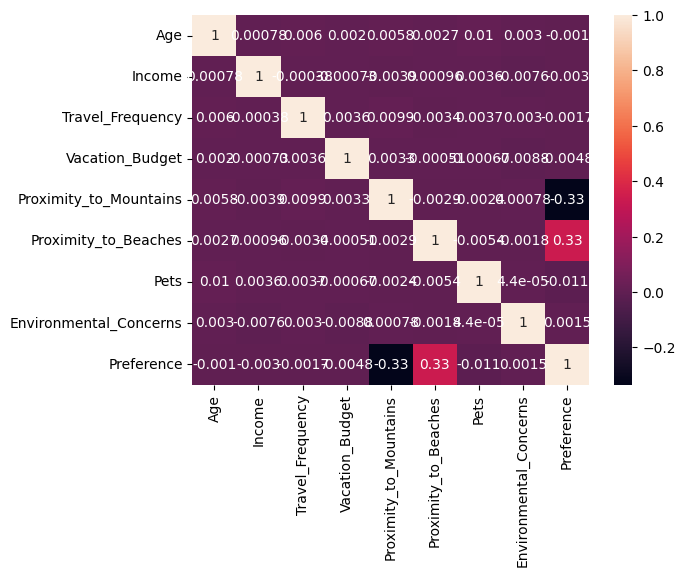

In [70]:
sns.heatmap(copy_df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Income', ylabel='Count'>

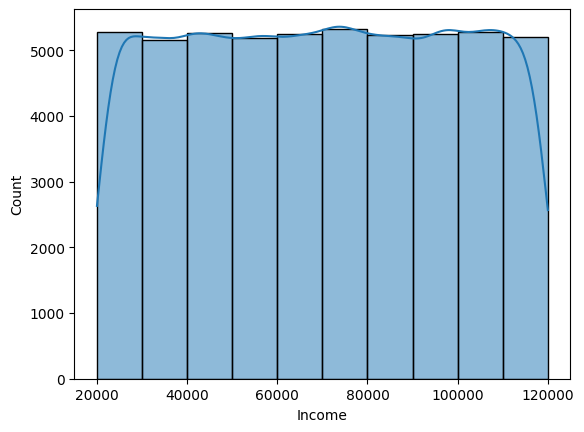

In [71]:
sns.histplot(df["Income"], kde=True, bins=10)

In [72]:
#dropnuva raboti shto ne ni trebaat za modelot
df= df.drop(columns=["Preferred_Activities","Favorite_Season","Pets","Environmental_Concerns","Preference"])
df.head()        

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches
0,56.0,male,71477,bachelor,9,2477,urban,175.0,267
1,69.0,male,88740,master,1,4777,suburban,NaN,190
2,46.0,female,46562,master,0,1469,urban,71.0,280
3,32.0,non-binary,99044,high school,6,1482,rural,31.0,255
4,60.0,female,106583,high school,5,516,suburban,23.0,151


In [73]:
df["Gender"].unique()

array(['male', 'female', 'non-binary'], dtype=object)

In [74]:
df["Location"].unique()

array(['urban', 'suburban', 'rural'], dtype=object)

In [75]:
df["Education_Level"].unique()

array(['bachelor', 'master', 'high school', 'doctorate', nan],
      dtype=object)

In [76]:
percentage_of_missing_values_per_column = df.isnull().sum() / len(df) * 100
percentage_of_missing_values_per_column

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
dtype: float64

<Axes: >

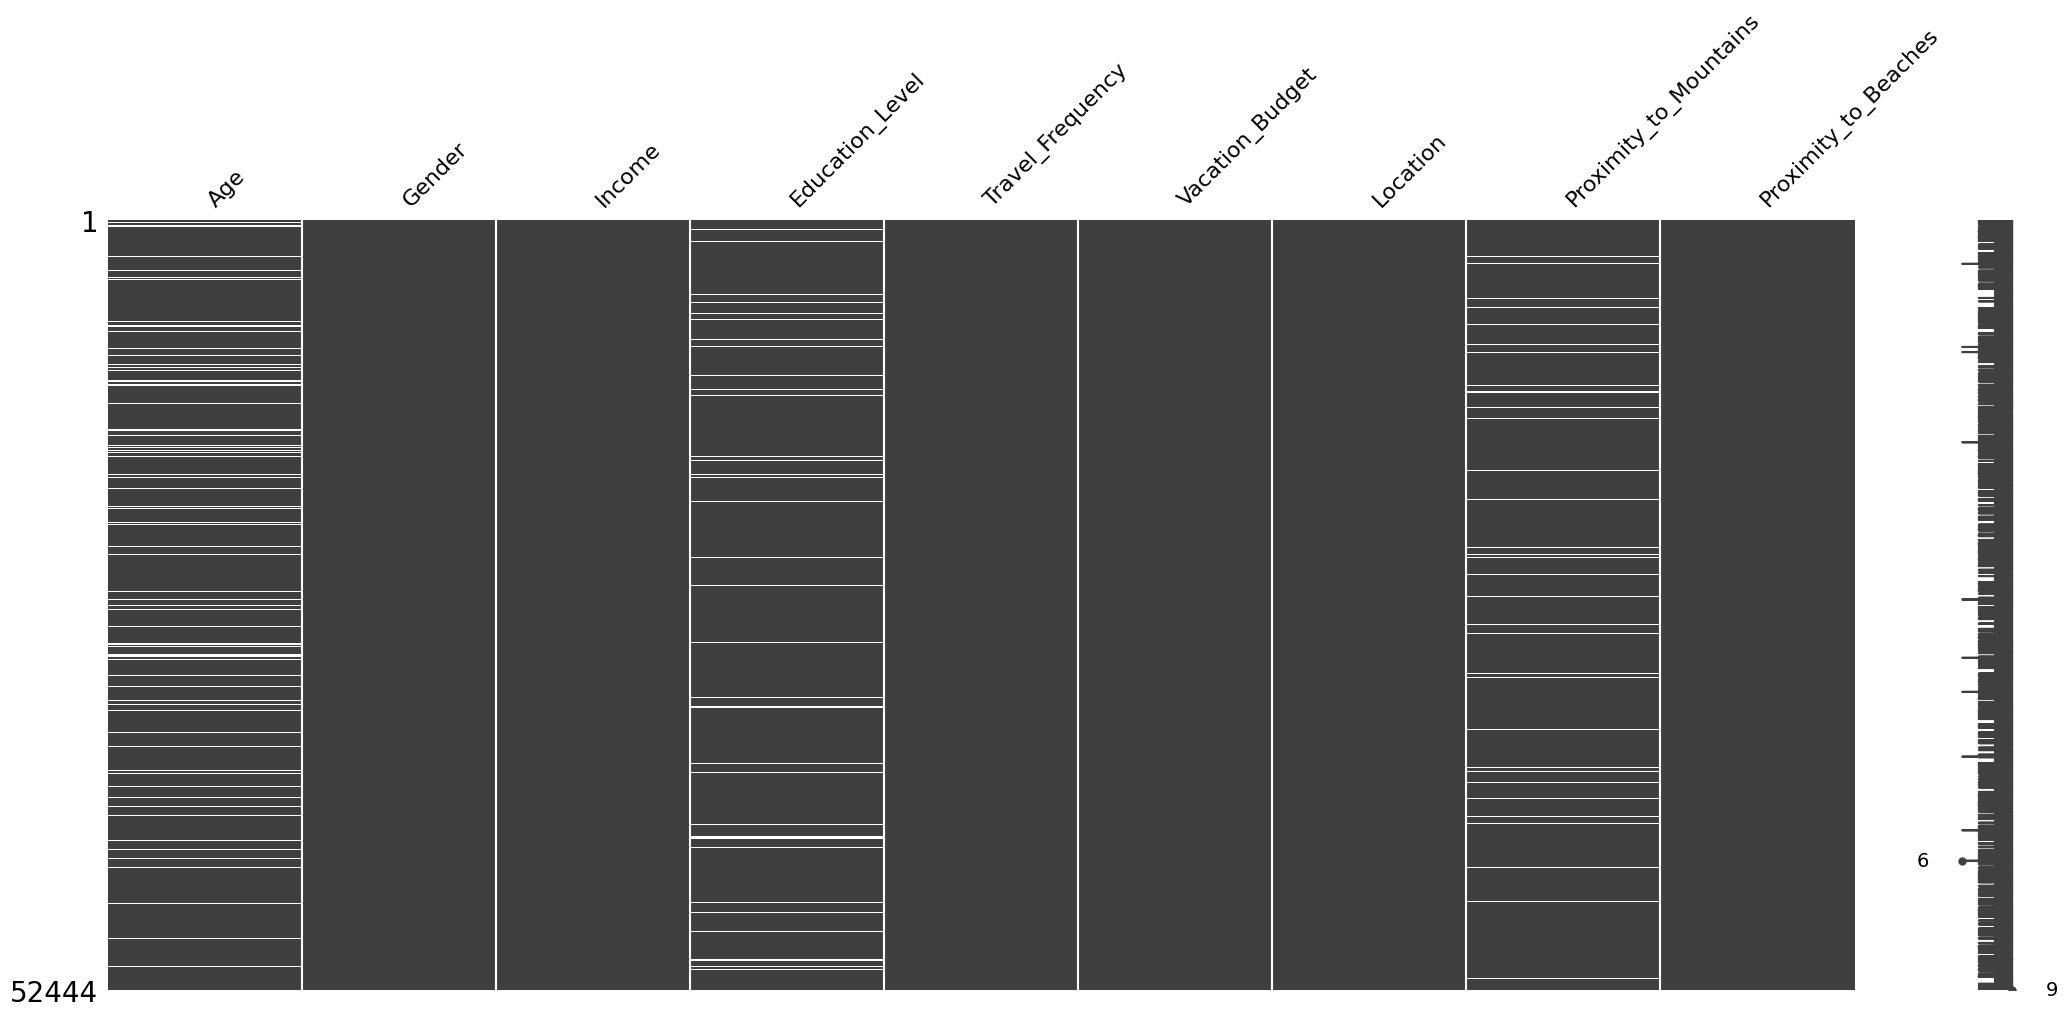

In [77]:
msno.matrix(df)

<Axes: xlabel='Education_Level'>

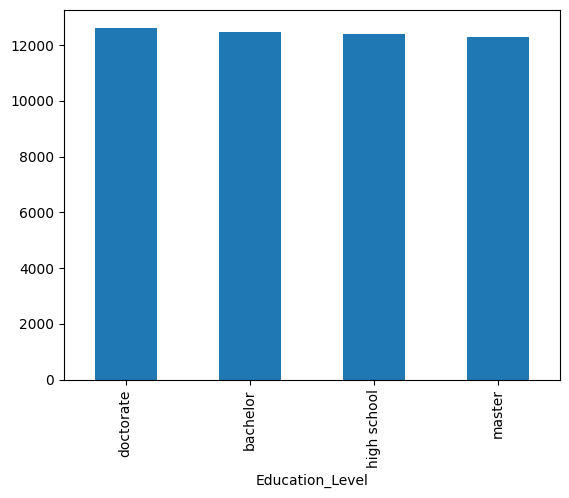

In [78]:
#Education Level impute
df["Education_Level"].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

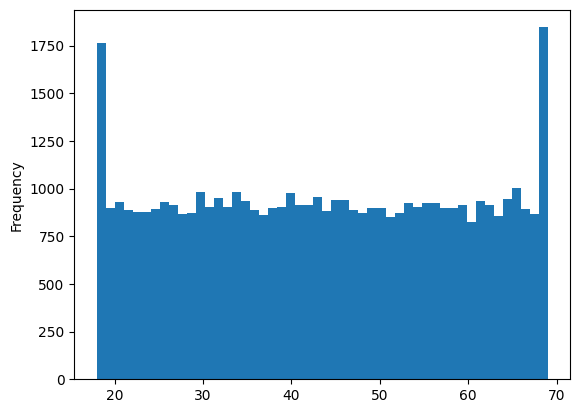

In [79]:
df["Age"].plot.hist(bins=50)

<Axes: xlabel='Education_Level', ylabel='Income'>

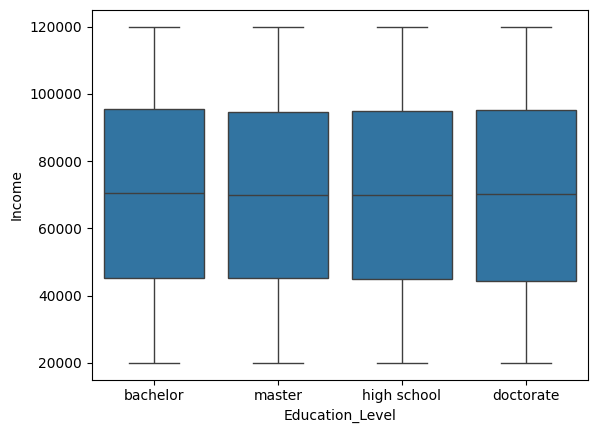

In [80]:
sns.boxplot(df, x="Education_Level", y="Income")

In [81]:
#bidejki nema nekakva korelacija megu education level i income, stavame mean impute na missing education level
most_frequent_imputer = SimpleImputer(strategy="most_frequent")
df[["Education_Level"]] = most_frequent_imputer.fit_transform(df[["Education_Level"]])
num = df.isnull().sum()
num

Age                       5244
Gender                       0
Income                       0
Education_Level              0
Travel_Frequency             0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
dtype: int64

<Axes: xlabel='Age', ylabel='Income'>

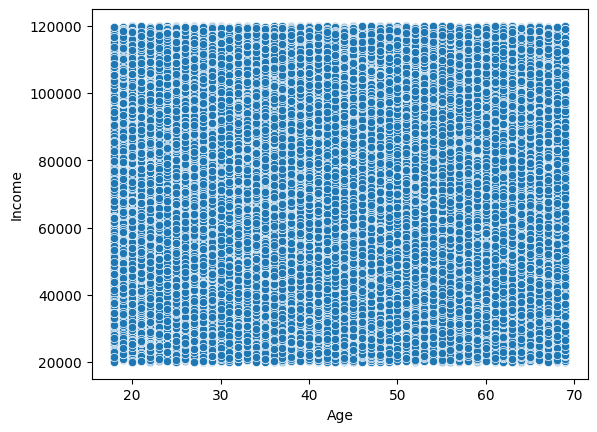

In [82]:
sns.scatterplot(df, x="Age", y="Income")

<Axes: >

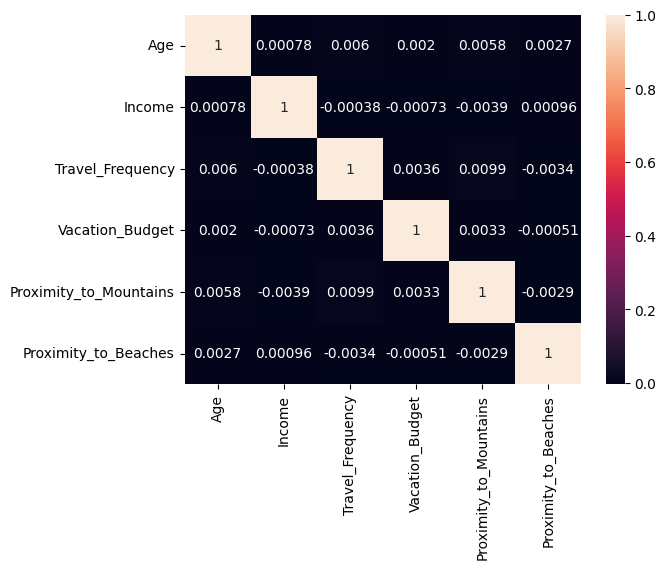

In [83]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [84]:
#Age impute
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(df[["Age", "Proximity_to_Mountains","Income","Travel_Frequency"]])
df["Age"] = imputed_data[:,0]
df["Proximity_to_Mountains"] = imputed_data[:,1]

percentage_of_missing_values_per_column = df.isnull().sum() / len(df) * 100
percentage_of_missing_values_per_column

Age                       0.0
Gender                    0.0
Income                    0.0
Education_Level           0.0
Travel_Frequency          0.0
Vacation_Budget           0.0
Location                  0.0
Proximity_to_Mountains    0.0
Proximity_to_Beaches      0.0
dtype: float64

In [85]:
#ordinal encoding za education level
#['bachelor', 'master', 'high school', 'doctorate'

values = df[["Education_Level"]]
ordinal_encoder = OrdinalEncoder(categories=[["high school", "bachelor", "master","doctorate"]])
encoded_values = ordinal_encoder.fit_transform(values)
df["Education_Level"] = encoded_values
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches
0,56.0,male,71477,1.0,9,2477,urban,175.0,267
1,69.0,male,88740,2.0,1,4777,suburban,177.4,190
2,46.0,female,46562,2.0,0,1469,urban,71.0,280
3,32.0,non-binary,99044,0.0,6,1482,rural,31.0,255
4,60.0,female,106583,0.0,5,516,suburban,23.0,151


In [86]:
#one hot encoding za 3 gender values
one_hot_encoded_values = pd.get_dummies(df["Gender"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df = df.drop(columns = "Gender")
df.head()

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,female,male,non-binary
0,56.0,71477,1.0,9,2477,urban,175.0,267,False,True,False
1,69.0,88740,2.0,1,4777,suburban,177.4,190,False,True,False
2,46.0,46562,2.0,0,1469,urban,71.0,280,True,False,False
3,32.0,99044,0.0,6,1482,rural,31.0,255,False,False,True
4,60.0,106583,0.0,5,516,suburban,23.0,151,True,False,False


In [87]:
#One hot encoding za 3 location values
one_hot_encoded_values = pd.get_dummies(df["Location"])
df = pd.concat([df, one_hot_encoded_values], axis=1)
df = df.drop(columns = "Location")
df.head()

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,female,male,non-binary,rural,suburban,urban
0,56.0,71477,1.0,9,2477,175.0,267,False,True,False,False,False,True
1,69.0,88740,2.0,1,4777,177.4,190,False,True,False,False,True,False
2,46.0,46562,2.0,0,1469,71.0,280,True,False,False,False,False,True
3,32.0,99044,0.0,6,1482,31.0,255,False,False,True,True,False,False
4,60.0,106583,0.0,5,516,23.0,151,True,False,False,False,True,False


In [89]:
#ordinal encoding za income
"""
    Dopolnitelna zadaca:
    income <50K = low
    50-90 = minimum
    >90 = high
    nova kolona so ovie, i model za da predvidime klasifikacija
"""

values = df[["Income"]]

def encode_income(value):
    if value < 50000:
        return 1  # Low
    elif value <= 90000:
        return 2  # Minimum
    else:
        return 3  # High

df["Income"] = df["Income"].apply(encode_income)

df["Income"].unique()
df.head()

,Age,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,female,male,non-binary,rural,suburban,urban
0,56.0,2,1.0,9,2477,175.0,267,False,True,False,False,False,True
1,69.0,2,2.0,1,4777,177.4,190,False,True,False,False,True,False
2,46.0,1,2.0,0,1469,71.0,280,True,False,False,False,False,True
3,32.0,3,0.0,6,1482,31.0,255,False,False,True,True,False,False
4,60.0,3,0.0,5,516,23.0,151,True,False,False,False,True,False


In [92]:
#postavuvanje na features i target i report na klasifikacii

X, y = df.drop(columns=["Income"]), df["Income"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier().fit(train_X, train_y)

pred_y = classifier.predict(test_X)

print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           1       0.30      0.30      0.30      3154
           2       0.40      0.39      0.39      4200
           3       0.30      0.31      0.31      3135

    accuracy                           0.34     10489
   macro avg       0.33      0.33      0.33     10489
weighted avg       0.34      0.34      0.34     10489

